In [1]:
import ge
import pandas as pd
import sklearn.linear_model
import feyn
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import multiprocessing

This Feyn package and QLattice is licensed to Casper Wilstrup, Abzu. By using this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


In [2]:
np.random.seed(0)
df = None
sample_size = 200
iterations = 100
n_features = [1]

In [3]:
def measure_dataset(ix):
    dataset_name=ge.datasets[ix]
    population = ge.get_dataset(dataset_name, n_features=1)
    sub = ge.measure_generalization_error(population, iterations=iterations, sample_size=sample_size)
    sub["dataset"]=dataset_name
    sub["dataset_id"]=ix
    return sub


In [4]:
# Create a pool of workers to run in parallel
with multiprocessing.Pool(processes=6) as pool:
    # Map the function to the inputs, distributing the work across multiple processes
    results = pool.map(measure_dataset, range(18), chunksize=1)


100%|█████████████████████████████████████████| 100/100 [00:35<00:00,  2.80it/s]


In [5]:
df = pd.concat(results).reset_index(drop=True)

In [6]:
m = df.copy()

In [7]:
#m = ge.remove_outliers(m, columns=["loss_mae_str_norm"], sensitivity=8)

<AxesSubplot: xlabel='f1_normality', ylabel='generalization_error'>

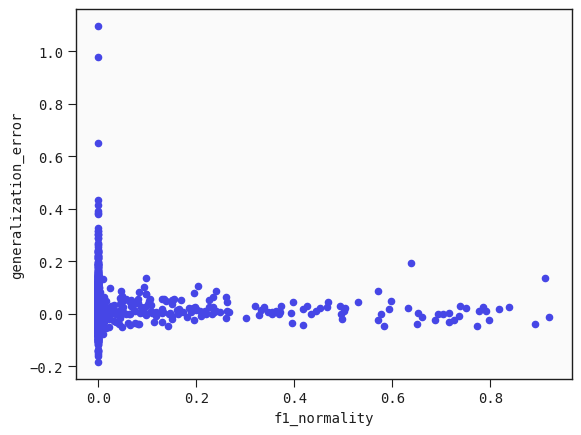

In [8]:
m.plot.scatter("f1_normality", "generalization_error")

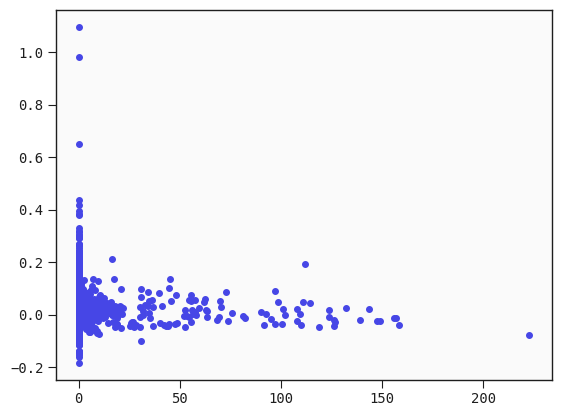

In [9]:
plt.scatter(x=np.sqrt(m.f1_normality)/m.target_std, y=m.generalization_error)

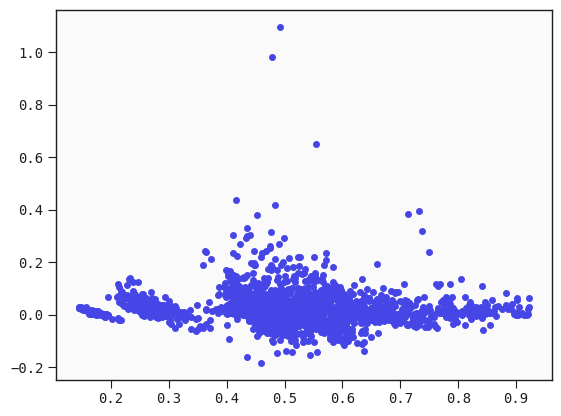

In [10]:
plt.scatter(x=m.loss_mae_std/m.target_std, y=m.generalization_error)

In [11]:
m.corrwith(m.generalization_error, numeric_only=True)

n_features                   NaN
loss_mse_std           -0.038677
target_mean            -0.049537
target_std             -0.052904
loss_mae_std           -0.055412
loss_mae_std_norm      -0.079014
boot_r2_std             0.066700
target_normality       -0.037507
f1_normality           -0.033679
r2                      0.075033
generalization_error    1.000000
dataset_id              0.083205
dtype: float64

In [22]:
ql = feyn.QLattice(0)

In [26]:
models = ql.auto_run(m.drop(columns=["dataset","dataset_id","r2"]), output_name="generalization_error", max_complexity=9)

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 651 216.0" width="651" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="471" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="50.0"><title>generalization_error
linear:
scale=0.640391
scale offset=0.000000
w=-0.511746
bias=0.0653</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">generali..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="59.0">out</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">1</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>boot_r2_std
linear:
scale=5.798790
scale offset=0.044442
w=-0.867391
bias=-0.0684</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">boot_r2_..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="89.0">3</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>boot_r2_std
linear:
scale=5.798790
scale offset=0.044442
w=-1.332156
bias=0.9852</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">boot_r2_..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>loss_mae_std_norm
linear:
scale=2.566670
scale offset=0.501203
w=1.506400
bias=-0.3817</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">loss_mae..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" he
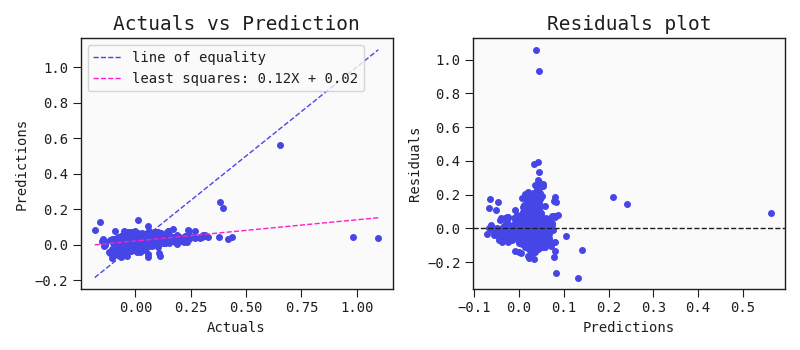

In [27]:
models[0].plot(m)

<AxesSubplot: >

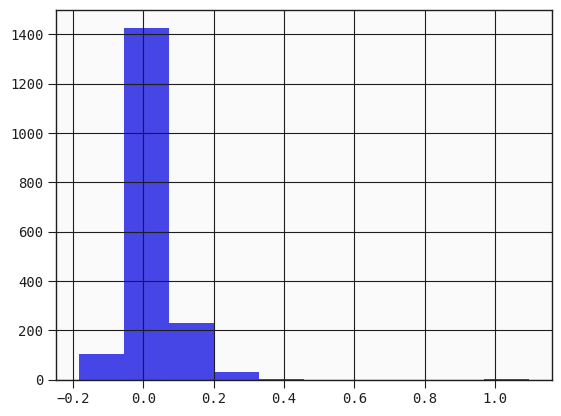

In [25]:
m[models[0].predict(m)<0.1].generalization_error.hist()

In [16]:
(models[0].absolute_error(m) > 0.05).sum()

520

In [17]:
m

,n_features,loss_mse_std,target_mean,target_std,loss_mae_std,loss_mae_std_norm,boot_r2_std,target_normality,f1_normality,r2,generalization_error,dataset,dataset_id
0,1,0.109919,7.912916,1.015013,0.170766,0.168241,0.007615,1.764156e-04,3.963359e-05,0.918561,0.001120,diamonds,0
1,1,0.106085,7.815856,0.972437,0.154288,0.158662,0.008050,1.387341e-04,5.206555e-06,0.935849,0.020356,diamonds,0
2,1,0.127379,7.780952,0.995950,0.174220,0.174928,0.009498,4.296151e-05,2.475116e-06,0.923835,0.007115,diamonds,0
3,1,0.122437,7.758502,1.056909,0.175166,0.165734,0.008115,4.381222e-07,3.259834e-08,0.928859,0.012064,diamonds,0
4,1,0.205064,7.900951,0.999969,0.189671,0.189677,0.015758,6.673327e-05,7.582072e-05,0.919811,0.003639,diamonds,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1,7.053709,10.449225,1.069910,0.814346,0.761135,0.065588,2.296803e-19,8.249196e-15,0.157045,0.116187,house_16H,17
1796,1,0.807067,10.423596,0.730718,0.434850,0.595100,0.048960,3.465696e-10,1.981591e-13,0.172017,0.104563,house_16H,17
1797,1,0.714562,10.463862,0.712079,0.417193,0.585880,0.040921,2.352326e-08,4.137619e-18,0.157081,0.073339,house_16H,17
1798,1,0.628302,10.518920,0.663500,0.366770,0.552781,0.054703,6.813321e-06,1.334628e-18,0.161749,0.077344,house_16H,17


In [18]:
(m.generalization_error>0.05).sum()

427